In [2]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
f = netCDF4.Dataset('rtofs_glo_3dz_f024_daily_3zvio.nc')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    title: HYCOM ATLb2.00
    institution: National Centers for Environmental Prediction
    source: HYCOM archive file
    experiment: 92.4
    history: archv2ncdf3z
    dimensions(sizes): MT(1), Y(3298), X(4500), Depth(33)
    variables(dimensions): float64 MT(MT), float64 Date(MT), float32 Depth(Depth), int32 Y(Y), int32 X(X), float32 Latitude(Y,X), float32 Longitude(Y,X), float32 v(MT,Depth,Y,X)
    groups: 



In [4]:
print(f.variables.keys()) # get all variable names
temp = f.variables['Depth']  # temperature variable
print(temp)

odict_keys(['MT', 'Date', 'Depth', 'Y', 'X', 'Latitude', 'Longitude', 'v'])
<class 'netCDF4._netCDF4.Variable'>
float32 Depth(Depth)
    standard_name: depth
    units: m
    positive: down
    axis: Z
unlimited dimensions: 
current shape = (33,)
filling off



In [5]:
for d in f.dimensions.items():
    print(d)

('MT', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'MT', size = 1
)
('Y', <class 'netCDF4._netCDF4.Dimension'>: name = 'Y', size = 3298
)
('X', <class 'netCDF4._netCDF4.Dimension'>: name = 'X', size = 4500
)
('Depth', <class 'netCDF4._netCDF4.Dimension'>: name = 'Depth', size = 33
)


In [6]:
mt = f.variables['MT']
depth = f.variables['Depth']
x,y = f.variables['X'], f.variables['Y']
print(mt)
print(x)

<class 'netCDF4._netCDF4.Variable'>
float64 MT(MT)
    long_name: time
    units: days since 1900-12-31 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: MT
current shape = (1,)
filling off

<class 'netCDF4._netCDF4.Variable'>
int32 X(X)
    point_spacing: even
    axis: X
unlimited dimensions: 
current shape = (4500,)
filling off



In [7]:
xx,yy = x[:], y[:]

In [8]:
lat, lon = f.variables['Latitude'], f.variables['Longitude']
print(lat)

<class 'netCDF4._netCDF4.Variable'>
float32 Latitude(Y, X)
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (3298, 4500)
filling off



In [9]:
# extract lat/lon values (in degrees) to numpy arrays# extrac 
latvals = lat[:]; lngvals = lon[:] 
latvals[:, 4499]

masked_array(data = [-78.63999939 -78.60800171 -78.5759964  ...,  47.04187775  47.04187775
  47.04187775],
             mask = False,
       fill_value = 1e+20)

In [10]:
aa = list(range(0, 4500, 50))
print(len(aa))
bb = list(range(0, 3298, 34))
print(len(bb))

90
97


In [11]:
print(bb)

[0, 34, 68, 102, 136, 170, 204, 238, 272, 306, 340, 374, 408, 442, 476, 510, 544, 578, 612, 646, 680, 714, 748, 782, 816, 850, 884, 918, 952, 986, 1020, 1054, 1088, 1122, 1156, 1190, 1224, 1258, 1292, 1326, 1360, 1394, 1428, 1462, 1496, 1530, 1564, 1598, 1632, 1666, 1700, 1734, 1768, 1802, 1836, 1870, 1904, 1938, 1972, 2006, 2040, 2074, 2108, 2142, 2176, 2210, 2244, 2278, 2312, 2346, 2380, 2414, 2448, 2482, 2516, 2550, 2584, 2618, 2652, 2686, 2720, 2754, 2788, 2822, 2856, 2890, 2924, 2958, 2992, 3026, 3060, 3094, 3128, 3162, 3196, 3230, 3264]


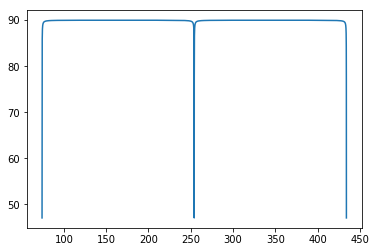

In [12]:
plt.plot(lngvals[3296, :], latvals[3296, :])

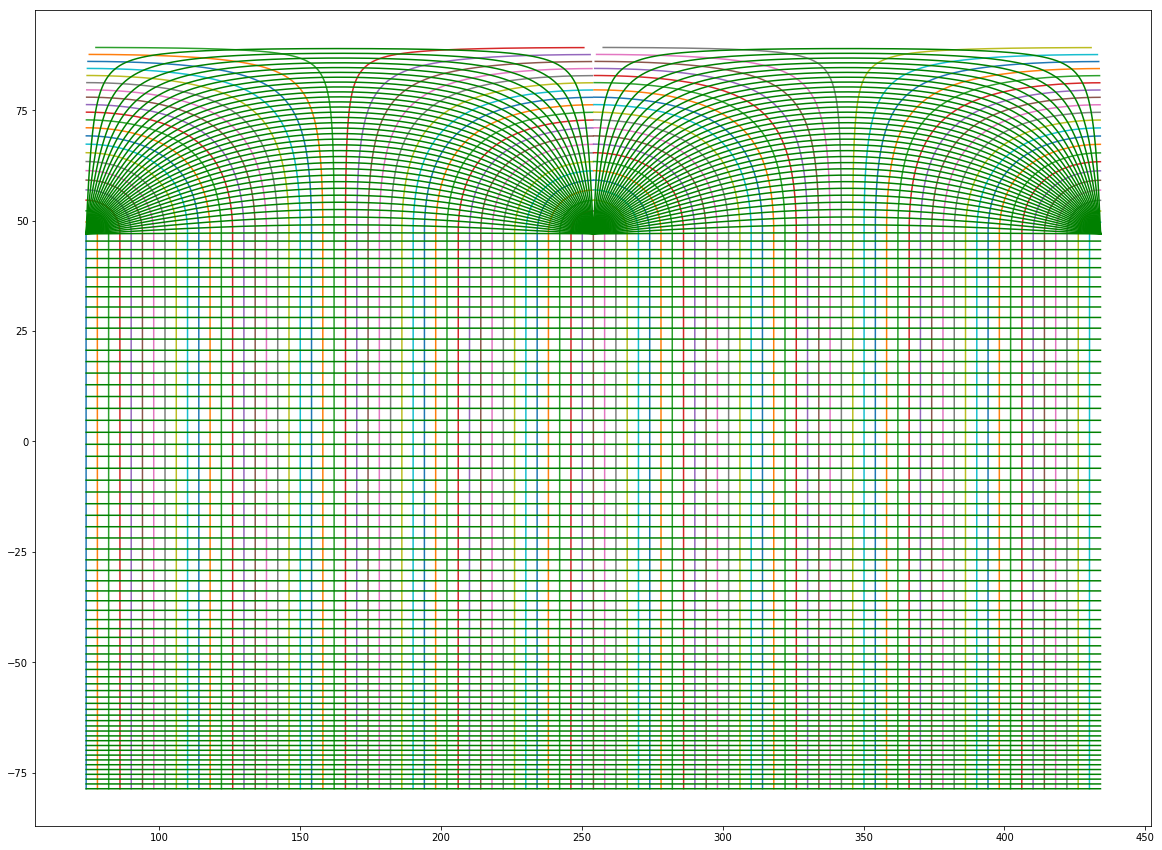

In [13]:
plt.figure(figsize = (20, 15))
for i in range(len(aa)):
    plt.plot(lngvals[0:3296, aa[i]], latvals[0:3296, aa[i]])
for i in range(len(bb)):
    plt.plot(lngvals[bb[i], :], latvals[bb[i], :], color = 'green')
plt.show()

/home/anonim/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/anonim/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/anonim/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/anonim/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


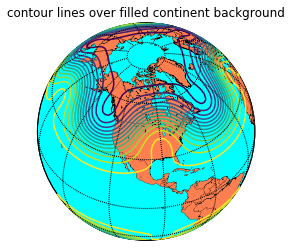

In [14]:
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

/home/anonim/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


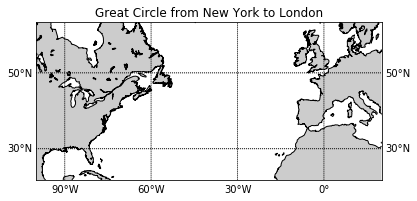

In [15]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
#m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Great Circle from New York to London')
plt.show()

In [12]:
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        if ((lngvals[j, i] >= 500) & (j != 3297)):
            print (i, j, lngvals[j, i])

KeyboardInterrupt: 